This code is all about Building State Schema with TypedDict Vs DataClasses

In [2]:
#1) Typical TypedDict Schema
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal
import random

class TypedDictState(TypedDict):
    name:str
    game:Literal['cricket','badminton']


In [3]:
def gameplay(state:TypedDictState):
    print('gameplay node has been called')
    return {"name":state['name']}

def cricket(state:TypedDictState):
    print('cricket node has been called')
    return {"game":'cricket'}

def badminton(state:TypedDictState):
    print('badminton node has been called')
    return {"game":'badminton'}

def randomplay(state:TypedDictState)-> Literal['cricket','badminton']:
    if random.random()>0.5:
        return 'cricket'
    else:
        return 'badminton'



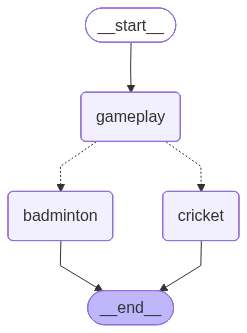

In [4]:
graph =StateGraph(TypedDictState)

graph.add_node('gameplay',gameplay)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)

graph.add_edge(START,'gameplay')
graph.add_conditional_edges('gameplay',randomplay)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

graph_builder =graph.compile()

from IPython.display import Image,display

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [5]:
graph_builder.invoke({"name":'arshad'})

gameplay node has been called
cricket node has been called


{'name': 'arshad', 'game': 'cricket'}

In the Cell below, the "name" key is given an int value, even though in the State schema we defined it as str

The reason is that TypedDict is only used for static type checking.

It does not enforce types at runtime.

Its main purpose is to help IDEs and type checkers detect mistakes before you run your code.

So using TypedDict ensures autocomplete, type hints, and early error detection, but it does not affect the runtime behavior of your program.

In [6]:
graph_builder.invoke({"name":123})

gameplay node has been called
badminton node has been called


{'name': 123, 'game': 'badminton'}

Dataclass Definition:

A dataclass is a class for structured data with runtime support.

You can add methods, default values, validators, etc.

Python will create a proper class with __init__, __repr__, __eq__, etc.

Full runtime type enforcement is possible (with external tools like Pydantic).

You can add methods and behavior directly.

LangGraph expects dict-like state, so you’d need .asdict() to convert to dict

"""But here we are not going to do dataclass Combined with Pydantic ,Just applying Dataclass instead of TypedDIct"""

In [7]:
from dataclasses import dataclass

@dataclass
class dataclassState:
    name :str
    game:Literal['cricket','badminton']

In [8]:
def gameplay(state:dataclassState):
    print('gameplay node has been called')
    return {"name":state.name} # Instead of calling in list with '' like [''] we need to use '.' while using dataclass

def cricket(state:dataclassState):
    print('cricket node has been called')
    return {"game":'cricket'}

def badminton(state:dataclassState):
    print('badminton node has been called')
    return {"game":'badminton'}

def randomplay(state:dataclassState)-> Literal['cricket','badminton']:
    if random.random()>0.5:
        return 'cricket'
    else:
        return 'badminton'



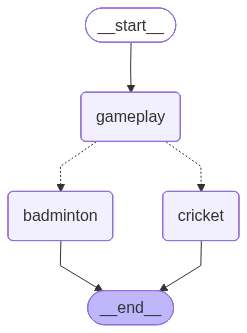

In [9]:
graph =StateGraph(dataclassState)

graph.add_node('gameplay',gameplay)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)

graph.add_edge(START,'gameplay')
graph.add_conditional_edges('gameplay',randomplay)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

graph_builder =graph.compile()

from IPython.display import Image,display

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [28]:
graph_builder.invoke(dataclassState(name=125,game='cr'))

gameplay node has been called
badminton node has been called


{'name': 125, 'game': 'badminton'}

In [ ]:
graph_builder.invoke(dataclassState(name=123)) # here only difference is it requires all parameters other than that no run time check like Typeddict , Everything same as typeddict

TypeError: dataclassState.__init__() missing 1 required positional argument: 'game'